# Welcome!

This notebook will introduce the main packages we will be using in this course:

* `numpy` for numerical calculations
* `scipy` for mathematical algorithms
* `matplotlib` for visualisation
* `pandas` for data wrangling
* `statsmodels` for statistics

## NumPy

Numpy provides the _array_ data type and a wide range of functions to work with them. This pacakge forms the foundation for most scientific computation done with python. Spending time getting comfortable with using numpy is a wise investment. You can find resources to help you learn numpy [here](https://numpy.org/learn/).

## Scipy

[Scipy](https://docs.scipy.org/doc/scipy/tutorial/general.html) provides a wide range of mathematical algorithms build on top of the numpy array. For example, there are clustering algorithms, fourier transforms, numerical integration, and optimisation and root-finding algorithms.

## Matplotlib

Matplotlib is a general purpose plotting library for python. Visualisation is a key skill of the statistician, learning how to use an established plotting library is another wise investment. You can view a gallery of images made using matplotlib and their associated code [here](https://matplotlib.org/stable/gallery/index.html).

### Alternatives

There are many plotting libraries out there. Matplotlib is probably the most established plotting library in python so it is a good place to start. If you want to explore alternatives, [seaborn](https://seaborn.pydata.org/index.html) is a wrapper around matplotlib designed for statistical graphics and [altair](https://altair-viz.github.io/) is a more powerful declarative plotting package.

## Pandas

Much of the data we will consider in this coarse is _tabular_, meaning it can be represented as a table of values. The _dataframe_ is a data structure particularly well suited for working with tabular data. If you have any experience with R you will no doubt be familiar with its `data.frame`s. Pandas is an attempt to bring this functionality to the python ecosystem.

## Statsmodels

This package provides statistical algorithms.

# Numpy

The convention when using numpy is to import it as `np`.

In [1]:
import numpy as np

The `linspace` returns an array of uniformly spaced values.

In [2]:
x = np.linspace(0, 7, 100)

There are lots of things we want to be able to do with arrays: find the minimum and maximum, and sum of the values for example.

In [3]:
print(x.min())
print(x.max())
print(np.sum(x))

0.0
7.0
350.00000000000006


We might also want to count how many values are bigger than some threshold

In [4]:
x[x > 3].size

57

There is a bit going on in this expression: first we construct an array of boolean values with `x > 3`, second we use it to extract just those values from the array for which match the condition with `x[x > 3]`, finally we ask for the size of this array which is stored in the `size` attribute with `x[x > 3].size`.

**WARNING:** There are a couple of ways to index into a numpy array and they have different effects. Understanding how to exploit this is useful but beyond the scope of this course. 

Many of the functions in numpy are vectorised, which means that they apply element-wise to the values in the array. For example, we can evaluate the sine function on each element of the array.

In [5]:
sin_vals = np.sin(x)

# Scipy

Generating random numbers is a common task in statistics. The convention here is to import the statistics submodule as `stats`.

In [6]:
import scipy.stats as stats

There are lots of distributions available; [here is a full list](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions). The lines below return arrays of normal random variables.

In [7]:
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = x.size)

The `stats.norm` object has lots of methods though, for example, you can ask for the mean of the distribution and evaluate its probability density function.

In [8]:
stats.norm.mean(loc = 0, scale = 1)

0.0

In [9]:
stats.norm.pdf(x = 1, loc = 0, scale = 1)



0.24197072451914337

### Question

Generate a large number of random variable with a geometric distribution with parameter $p = 1/2$ and confirm that the average of these values is close to the mean of that distribution. 

*Hint:* the [wikipedia page](https://en.wikipedia.org/wiki/Geometric_distribution) for the geometric distribution may be useful with this.

### Answer

Use `stats.geom.rvs(p=0.5, size=10000)` to get the array of values and the `mean` method to compute the mean. You can calculate the mean of this distribution as $1/p$ of use the method which does this `stats.geom.mean(p=0.5)`

# Matplotlib

We will primarily use the pyplot interface for matplotlib. The convention here is to import this module as `plt`.

In [10]:
import matplotlib.pyplot as plt

Below we provide the code for some of the fundemental plots you will need. There is an extensive [gallery](https://matplotlib.org/stable/gallery/index.html) to demonstrate more complex plots. 

## Line plot

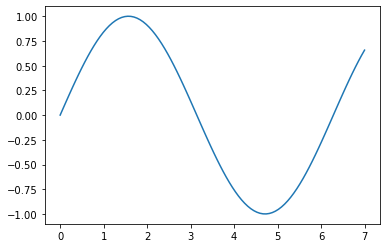

In [11]:
plt.plot(x, sin_vals)
plt.show()

## Scatter plot

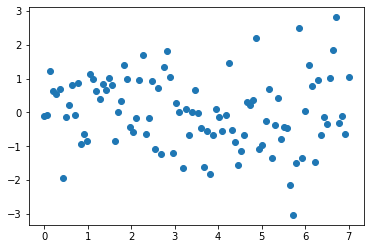

In [12]:
plt.scatter(x, norm_rvs)
plt.show()

## Histogram

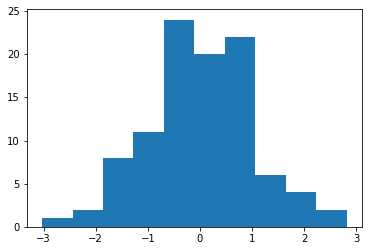

In [13]:
plt.hist(norm_rvs, bins = 10)
plt.show()

## Multiple layers

<ipython-input-14-b0f29f8369a7>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


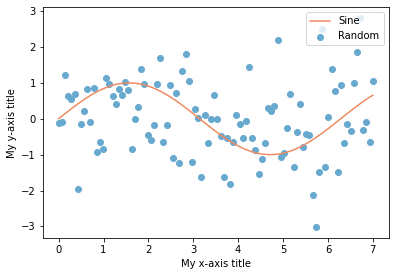

In [14]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x, sin_vals, color = "#ef8a62", label = "Sine")
ax.scatter(x, norm_rvs, color = "#67a9cf", label = "Random")
ax.legend(loc = "upper right")
ax.set_xlabel("My x-axis title")
ax.set_ylabel("My y-axis title")
fig.show()

## Challenge

Without looking at the answer below, attmpet to create this plot where the histogram is of 1000 exponential random variables, $\lambda = 1.0$, and we have drawn the density of this distribution on top.

<img src="./challenge-figure-hist.png" style="width: 500px;"/>

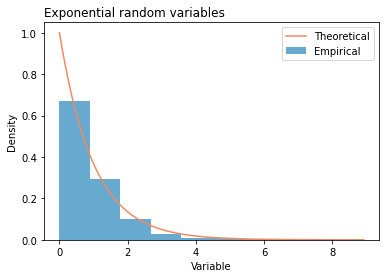

In [15]:
exp_rvs = stats.expon.rvs(scale = 1, size = 1000)
exp_x = np.linspace(exp_rvs.min(), exp_rvs.max(), 100)
exp_y = stats.expon.pdf(x = exp_x, scale = 1)

plt.hist(exp_rvs, density=True, color = "#67a9cf", label = "Empirical")
plt.plot(exp_x, exp_y, color = "#ef8a62", label = "Theoretical")
plt.legend(loc = "upper right")
plt.xlabel("Variable")
plt.ylabel("Density")
plt.title("Exponential random variables", loc = "left")
plt.show()

## Challenge

Without looking at the answer below, attmpet to create this plot where the number in the title is computed correctly for your random points.

<img src="./challenge-figure-box.png" style="width: 500px;"/>

<ipython-input-16-f587a590854a>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


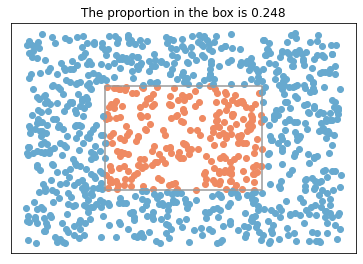

In [16]:
x = np.random.uniform(size = 1000)
y = np.random.uniform(size = 1000)
mask = (0.25 < x) & (x < 0.75) & (0.25 < y) & (y < 0.75)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot([0.25,0.25,0.75,0.75,0.25], [0.25,0.75,0.75,0.25,0.25], color = "#999999")
ax.scatter(x[mask], y[mask], color = "#ef8a62")
ax.scatter(x[np.logical_not(mask)], y[np.logical_not(mask)], color = "#67a9cf")
ax.set_title('The proportion in the box is {x}'.format(x= mask.sum() / mask.size))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.show()

# Pandas

Pandas provides functions for [reading data from many formats](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write). The convention is to import it as `pd`. The `head` method prints the first couple of rows in the dataframe.

In [17]:
import pandas as pd
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The following cell demonstrates how we can use the `query` method to select a subset of the data and then plot it.

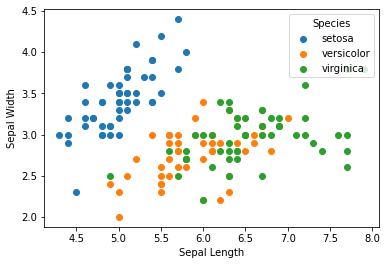

In [18]:
plt.figure()
for species in iris.species.unique():
    tmp = iris.query("species == '{s}'".format(s = species))
    plt.scatter(tmp.sepal_length, tmp.sepal_width, label = species)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title = "Species", loc = "upper right")
plt.show()

# Statsmodels

We will cover this in subsequent tutorials...